## EDA по данным риелторской компании

В файле clients.csv предоставлена информация о клиентах риелторской компании США за один месяц. Вам необходимо как специалисту по Data Science сделать следующее:

Используя данные о выборке, постройте типичный портрет целевого клиента компании (пол, возраст, какой тип квартиры он приобретает, какова площадь в кв. м , каков средний чек, цель покупки, источник лида (погуглите что такое лид в маркетинге, за это отвечает колонка Source).

Таким образом после вашего анализа, я хочу увидеть описание нашего целевого клиента с соответствующими визуализациями. Ожидаю увидеть как минимум 5 графиков с комментариями. Отнеситесь к заданию достойно, представьте, что от Вашего отчета зависит принятие важного решения.

---

**Баллы могут быть снижены** за качество кода - старайтесь чтобы код был максимально лаконичным. Названия переменных (если они используются) должны отражать максимальную ее сущность.

**Комментарии по сдаче практического задания**:
1. Залить в репу на github в папку module_2/descriptive_stats
2. Ссылку на репо отправлять мне на почту alexadevv@gmail.com не позднее дедлайна.
3. Тема письма: Домашнее задание по модулю 2 <Фамилия Имя>
4. После дедлайна, неотправленные на почту задания, оцениваются максимум в 7 баллов.

Загрузка и подготовка данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#предобработка
df = pd.read_csv('clients.csv')
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('(ft.)', '(m2)')
df['Area(m2)'] = df['Area(m2)'] * 0.092903
df['Price'] = df['Price'].replace({'\\$': '', ',': ''}, regex=True).astype(float)

df.head()

,ID,Building,Yearofsale,Monthofsale,Typeofproperty,Propertynumber,Area(m2),Price,Status,CustomerID,...,Y,M,D,Gender,Country,State,Purpose,Dealsatisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,69.035290,246172.68,Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,70.254178,246331.90,Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,54.560074,209280.91,Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,149.086089,452667.01,Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,127.783431,467083.31,Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


####Анализ половой статистики

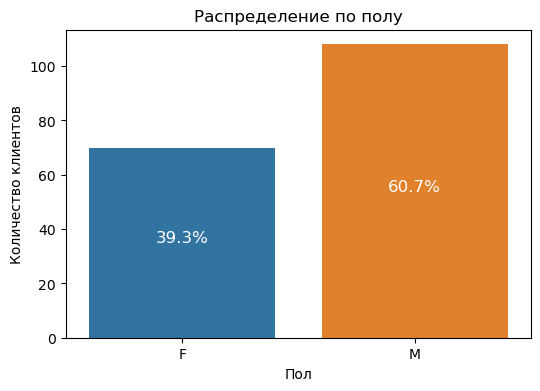

Gender
M    60.674157
F    39.325843
Name: proportion, dtype: float64


In [5]:
gender_counts = df['Gender'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=df, hue='Gender', legend=False)

for p in ax.patches:

    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2

    if p.get_x() < 0.5:  
        percentage = gender_counts['F']
    else:  
        percentage = gender_counts['M']

    ax.text(x_position, height / 2, f'{percentage:.1f}%', ha='center', fontsize=12, color='white')

plt.title('Распределение по полу')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.show()

print(gender_counts)


####Анализ возрастных интервалов

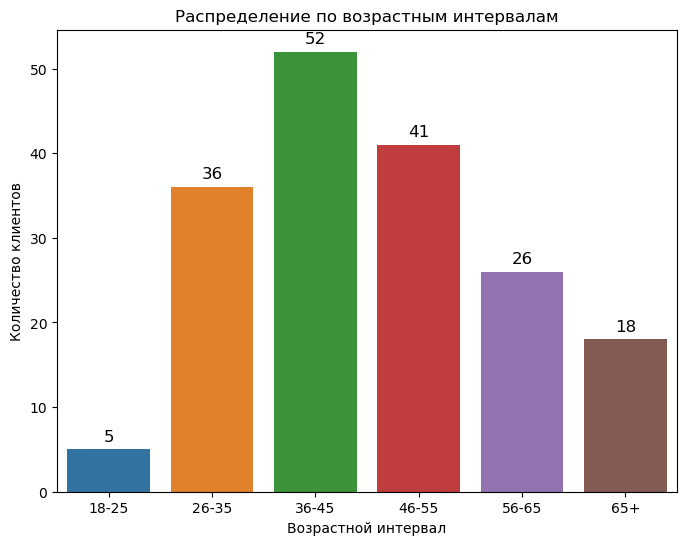

AgeInterval
18-25     5
26-35    36
36-45    52
46-55    41
56-65    26
65+      18
Name: count, dtype: int64


In [7]:
age_distribution = df['AgeInterval'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=age_distribution.index, y=age_distribution.values, legend=False , hue=age_distribution.index)

for i, count in enumerate(age_distribution):
    plt.text(i, count + 1, f'{count}', ha='center', fontsize=12)

plt.title('Распределение по возрастным интервалам')
plt.xlabel('Возрастной интервал')
plt.ylabel('Количество клиентов')
plt.show()

print(age_distribution)


####Анализ типа недвижимости

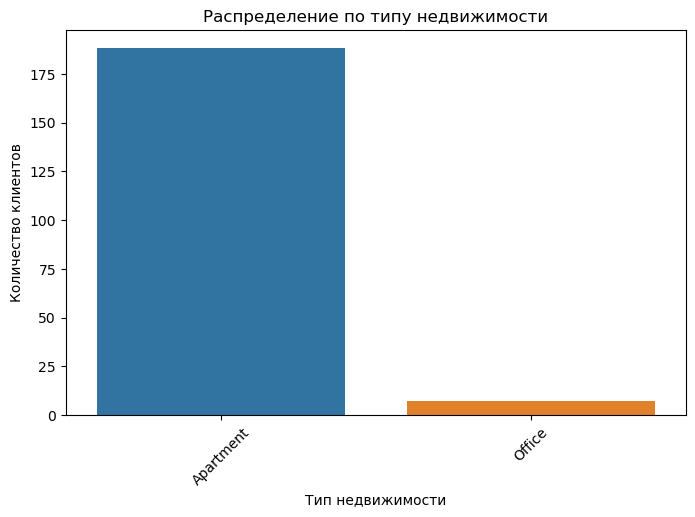

Typeofproperty
Apartment    188
Office         7
Name: count, dtype: int64


In [9]:
property_types = df['Typeofproperty'].value_counts()

plt.figure(figsize=(8, 5))
sns.countplot(x='Typeofproperty', data=df, hue='Typeofproperty' , legend=False )
plt.title('Распределение по типу недвижимости')
plt.xlabel('Тип недвижимости')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.show()

print(property_types)


 ###Анализ площади недвижимости

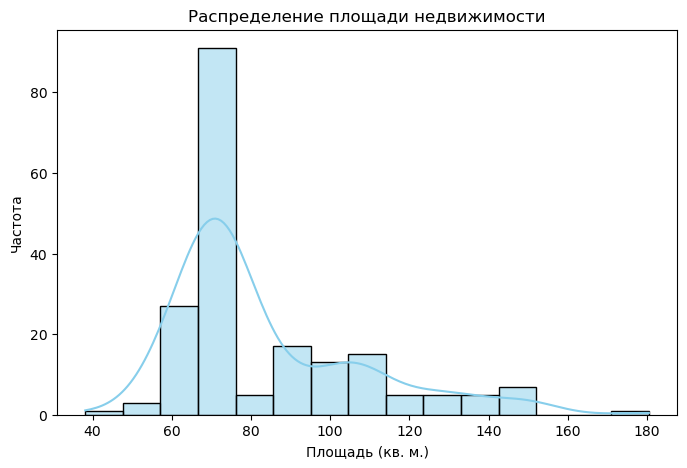

count    195.000000
mean      83.600356
std       24.293164
min       38.156191
25%       68.735214
50%       72.973448
75%       99.913460
max      180.464078
Name: Area(m2), dtype: float64


In [11]:

area_description = df['Area(m2)'].describe()

plt.figure(figsize=(8, 5))
sns.histplot(df['Area(m2)'], kde=True, bins=15, color='skyblue')
plt.title('Распределение площади недвижимости')
plt.xlabel('Площадь (кв. м.)')
plt.ylabel('Частота')
plt.show()

print(area_description)

###Средний чек

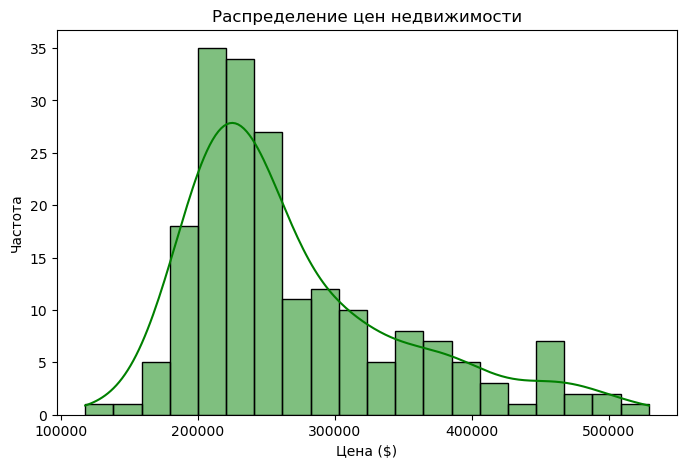

count       195.000000
mean     269434.560923
std       80129.094465
min      117564.070000
25%      212393.250000
50%      243052.590000
75%      308550.875000
max      529317.280000
Name: Price, dtype: float64


In [13]:
price_description = df['Price'].describe()


plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, bins=20, color='green')
plt.title('Распределение цен недвижимости')
plt.xlabel('Цена ($)')
plt.ylabel('Частота')
plt.show()

print(price_description)

@@@Цель покупки

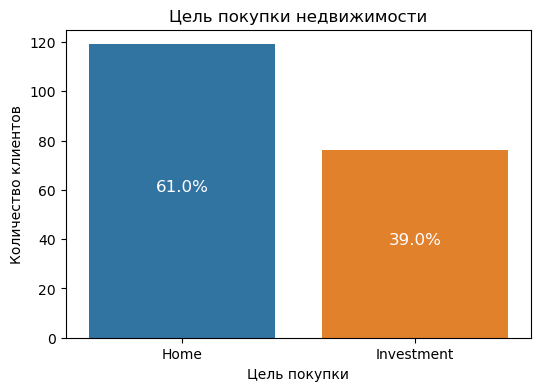

Purpose
Home          61.025641
Investment    38.974359
Name: proportion, dtype: float64


In [15]:
purpose_counts = df['Purpose'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Purpose', data=df, hue='Purpose', legend=False)

for p in ax.patches:

    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2

    if p.get_x() < 0.5:  
        percentage = purpose_counts['Home']
    else:  
        percentage =  purpose_counts['Investment']

    ax.text(x_position, height / 2, f'{percentage:.1f}%', ha='center', fontsize=12, color='white')


plt.title('Цель покупки недвижимости')
plt.xlabel('Цель покупки')
plt.ylabel('Количество клиентов')
plt.show()

print(purpose_counts)


Источник лида (Lead Source)

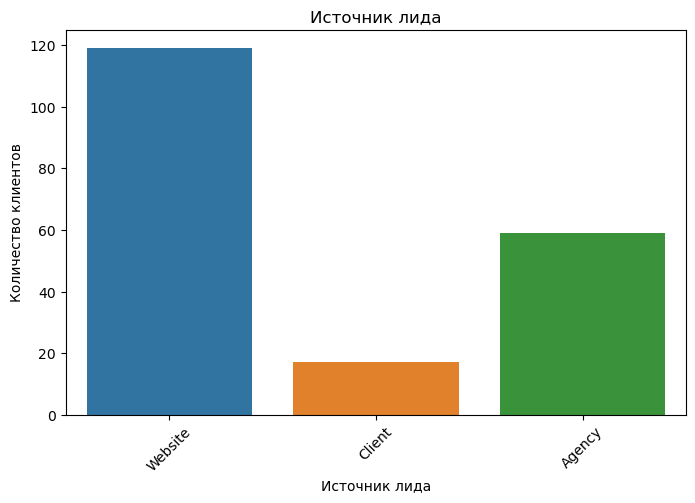

Source
Website    61.025641
Agency     30.256410
Client      8.717949
Name: proportion, dtype: float64


In [17]:
source_counts = df['Source'].value_counts(normalize=True)*100

plt.figure(figsize=(8, 5))
sns.countplot(x='Source', data=df, hue='Source', legend=False)
plt.title('Источник лида')
plt.xlabel('Источник лида')
plt.ylabel('Количество клиентов')
plt.xticks(rotation=45)
plt.show()

print(source_counts)

Итог: 

Основной целевой аудиторией являются мужчины в возрасте 36-45 лет, заинтересованные в покупке квартир для личного проживания, с средней ценой недвижимости около 269 000 долларов и площадью около 73 м². Эти клиенты активно ищут жилье для своей семьи или улучшения жилищных условий.

Второстепенные сегменты — это люди в возрасте 26-35 лет и 46-55 лет.

Клиенты в возрасте 18-25 лет и старше 65 лет составляют меньшую часть аудитории.

Целевая недвижимость — квартиры средней площади (до 100 м²) с ценой от 212 000 до 308 000 долларов.

Маркетинговая стратегия должна быть ориентирована на привлечение клиентов через вебсайт компании и агенства недвижимости.